In [210]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [211]:
# フォントの文字化けのための設定

import matplotlib.pyplot as plt

plt.rc('font', family = 'AppleGothic')
plt.rc('axes', unicode_minus = False)

In [212]:
# フォントが鮮明に見えるための設定

from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

In [213]:
df = pd.read_csv('상가업소정보_201912_01.csv', sep = '|')
df.shape

(573680, 39)

In [214]:
df.head()

상가업소번호            상호명         지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  상권업종중분류명  \
0  19905471         와라와라호프         NaN         Q       음식       Q09      유흥주점   
1  19911397  커피빈코리아선릉로93길점  코리아선릉로93길점         Q       음식       Q12    커피점/카페   
2  19911801           프로포즈         NaN         Q       음식       Q09      유흥주점   
3  19912201       싱싱커피&토스트         NaN         Q       음식       Q07     패스트푸드   
4  19932756       가락사우나내스낵         NaN         F    생활서비스       F09  대중목욕탕/휴게   

  상권업종소분류코드     상권업종소분류명 표준산업분류코드  ...                     건물관리번호       건물명  \
0    Q09A01        호프/맥주   I56219  ...  1168010600106040000014378      대치상가   
1    Q12A01  커피전문점/카페/다방   I56220  ...  1168010100106960042022041       NaN   
2    Q09A01        호프/맥주   I56219  ...  1154510200101620001017748       NaN   
3    Q07A10        토스트전문   I56192  ...  2653010400105780000002037  산업용품유통상가   
4    F09A02   사우나/증기탕/온천   S96121  ...  1171010500102560005010490       NaN   

                  도로명주소   구우편번호    신우편번호  동정보 층정보  호정보          경도         위도  
0  서울특별시 강남구 남부순환로 2933  135280   6280.0  NaN   1  NaN  127.061026  37.493922  
1    서울특별시 강남구 선릉로93길 6  135080   6149.0  NaN   1  NaN  127.047883  37.505675  
2    서울특별시 금천구 가산로 34-6  153010   8545.0  NaN   1  NaN  126.899220  37.471711  
3      부산광역시 사상구 괘감로 37  617726  46977.0  NaN   1   26  128.980455  35.159774  
4      서울특별시 송파구 가락로 71  138846   5690.0  NaN   1  NaN  127.104071  37.500249  

[5 rows x 39 columns]

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

<AxesSubplot:>

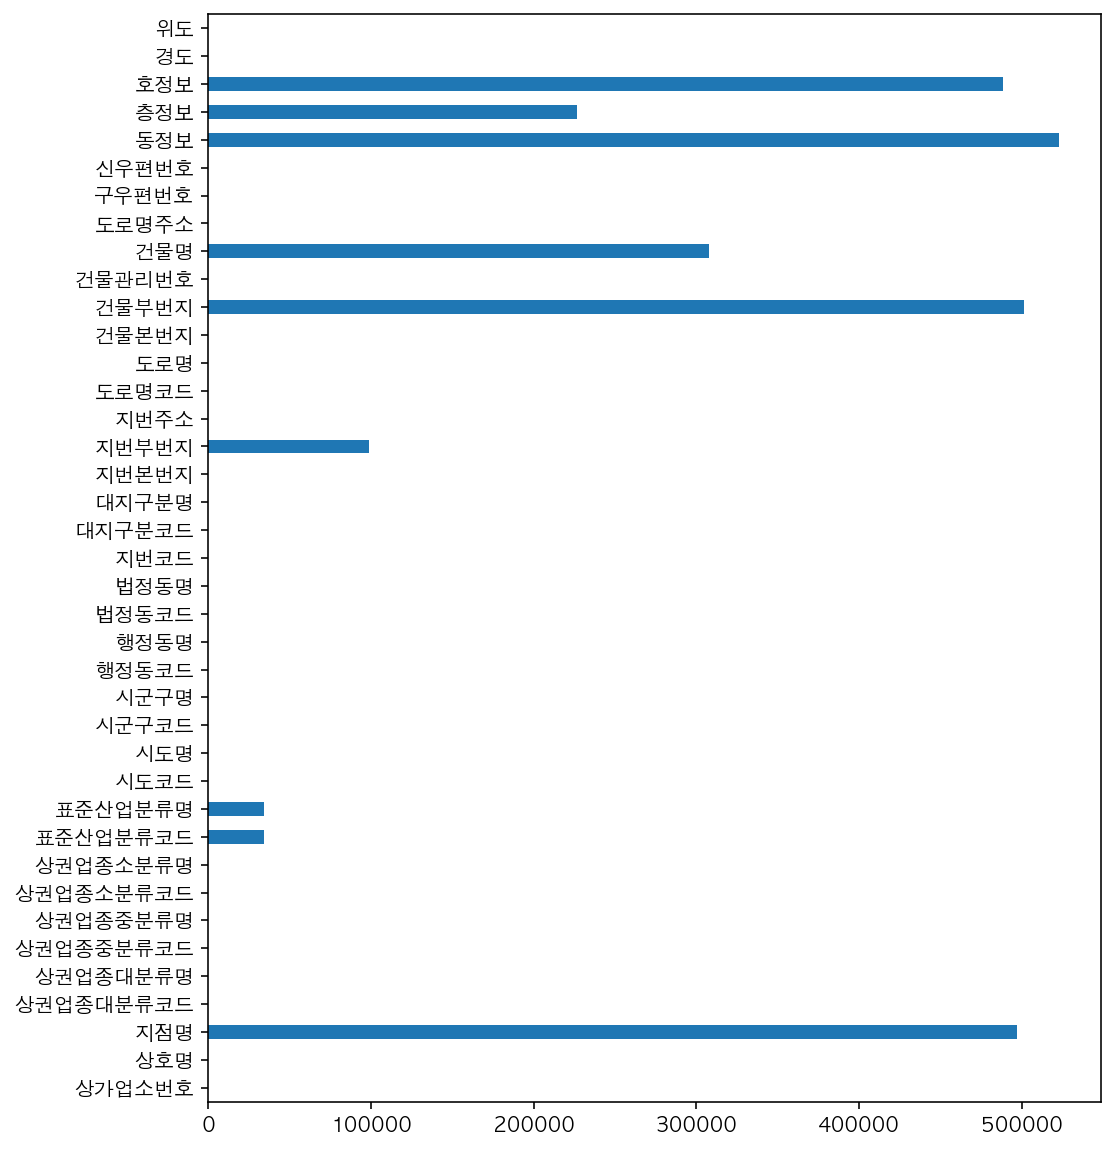

In [216]:
# NULL値　確認

df.isnull().sum().plot.barh(figsize = (8,10))

In [217]:
#　使用する列だけを抽出する

columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
           '경도', '위도']

df = df[columns].copy()
df.shape

(573680, 11)

In [218]:
# 列名日本語に変更

df.columns = ['店名', '商圏業種大分類名', '商圏業種中分類名', '商圏業種小分類名', '都市名', '市区名', '行政洞名', '法政洞名', '道路名住所', '経度', '緯度']

In [219]:
df.head()

店名 商圏業種大分類名  商圏業種中分類名     商圏業種小分類名    都市名  市区名  行政洞名 法政洞名  \
0         와라와라호프       음식      유흥주점        호프/맥주  서울특별시  강남구  대치1동  대치동   
1  커피빈코리아선릉로93길점       음식    커피점/카페  커피전문점/카페/다방  서울특별시  강남구  역삼1동  역삼동   
2           프로포즈       음식      유흥주점        호프/맥주  서울특별시  금천구  독산3동  독산동   
3       싱싱커피&토스트       음식     패스트푸드        토스트전문  부산광역시  사상구   괘법동  괘법동   
4       가락사우나내스낵    생활서비스  대중목욕탕/휴게   사우나/증기탕/온천  서울특별시  송파구   석촌동  석촌동   

                  道路名住所          経度         緯度  
0  서울특별시 강남구 남부순환로 2933  127.061026  37.493922  
1    서울특별시 강남구 선릉로93길 6  127.047883  37.505675  
2    서울특별시 금천구 가산로 34-6  126.899220  37.471711  
3      부산광역시 사상구 괘감로 37  128.980455  35.159774  
4      서울특별시 송파구 가락로 71  127.104071  37.500249

In [220]:
df_seoul = df[df['都市名'] == '서울특별시'].copy()
df_seoul.shape

(407376, 11)

In [221]:
# 店名の小文字化

df_seoul['店名_小文字'] = df_seoul['店名'].str.lower()

In [222]:
# Ediyaカフェを抽出

df_seoul[df_seoul['店名_小文字'].str.contains('이디야|이디아|ediya')].shape

(543, 12)

In [223]:
df_seoul.loc[df_seoul['店名_小文字'].str.contains('이디야|이디아|ediya'), '店名_小文字'].shape

(543,)

In [224]:
# Starbucksカフェを抽出

df_seoul[df_seoul['店名_小文字'].str.contains('스타벅스|starbucks')]

店名 商圏業種大分類名 商圏業種中分類名     商圏業種小分類名    都市名   市区名  \
1104              스타벅스       음식   커피점/카페  커피전문점/카페/다방  서울특별시   용산구   
2023         스타벅스종로3가점       음식   커피점/카페  커피전문점/카페/다방  서울특별시   종로구   
2770              스타벅스       음식   커피점/카페  커피전문점/카페/다방  서울특별시   서초구   
14770   스타벅스커피여의도IFC1F       음식   커피점/카페  커피전문점/카페/다방  서울특별시  영등포구   
14781             스타벅스       음식   커피점/카페  커피전문점/카페/다방  서울특별시   강남구   
...                ...      ...      ...          ...    ...   ...   
563387            스타벅스       음식   커피점/카페  커피전문점/카페/다방  서울특별시   용산구   
567090            스타벅스       음식   커피점/카페  커피전문점/카페/다방  서울특별시   관악구   
567828            스타벅스       음식   커피점/카페  커피전문점/카페/다방  서울특별시   성동구   
570096            스타벅스       음식   커피점/카페  커피전문점/카페/다방  서울특별시  서대문구   
571052            스타벅스       음식   커피점/카페  커피전문점/카페/다방  서울특별시  서대문구   

               行政洞名   法政洞名                    道路名住所          経度         緯度  \
1104          이태원1동   이태원동       서울특별시 용산구 이태원로 188  126.994781  37.534303   
2023    종로1.2.3.4가동   종로3가       서울특별시 종로구 종로 113-1  126.990207  37.570585   
2770            잠원동    잠원동       서울특별시 서초구 강남대로 581  127.019763  37.513663   
14770           여의동   여의도동      서울특별시 영등포구 국제금융로 10  126.924863  37.525172   
14781          삼성1동    삼성동     서울특별시 강남구 테헤란로103길 9  127.063878  37.510038   
...             ...    ...                      ...         ...        ...   
563387         한강로동  한강로2가        서울특별시 용산구 한강대로 69  126.965220  37.527452   
567090         낙성대동    봉천동        서울특별시 관악구 관악로 158  126.952792  37.479298   
567828        금호4가동  금호동4가         서울특별시 성동구 동호로 99  127.015329  37.548028   
570096         북아현동   북아현동       서울특별시 서대문구 북아현로 29  126.956144  37.560080   
571052        북가좌2동   북가좌동  서울특별시 서대문구 증가로29길 20-14  126.911859  37.582341   

                店名_小文字  
1104              스타벅스  
2023         스타벅스종로3가점  
2770              스타벅스  
14770   스타벅스커피여의도ifc1f  
14781             스타벅스  
...                ...  
563387            스타벅스  
567090            스타벅스  
567828            스타벅스  
570096            스타벅스  
571052            스타벅스  

[506 rows x 12 columns]

In [225]:
df_seoul.loc[df_seoul['店名_小文字'].str.contains('스타벅스|starbucks'), '店名_小文字'].shape

(506,)

In [226]:
df_cafe = df_seoul[df_seoul['店名_小文字'].str.contains('이디아|이디야|ediya|스타벅스|starbucks')].copy()
df_cafe.shape

(1049, 12)

In [227]:
# df_cafeの店名_小文字の種類

df_cafe['店名_小文字'].unique()

array(['스타벅스', '이디야커피', '스타벅스종로3가점', '이디아', '스타벅스커피여의도ifc1f',
       '이디야ibk고객센터', '스타벅스신림사거리점', '대신이디아이서원주유소', '이디야서대문점2호',
       '스타벅스커피홍대역', '이디아커피', '스타벅스올림픽평화의문점', 'ediya커피', '스타벅스새문안로점',
       '스타벅스연신내역', '스타벅스연세백양로점', '스타벅스가락시장역점', '스타벅스외대점', '스타벅스명지대점',
       '스타벅스석촌역', '스타벅스압구정로데오역', '이디야커피전농뉴타운점', '스타벅스연대동문', '스타벅스서울대입구역점',
       '스타벅스신림점', '이디아이박정어학원', '스타벅스강남삼성타운점', '스타벅스사당점', '스타벅스광장점',
       '스타벅스신촌명물거리점', '스타벅스명동미래', '스타벅스건국클래식점', '이디아커피선릉아이빌점',
       '스타벅스연희dt점', '스타벅스삼선교점', '스타벅스커피여의도호성', '스타벅스충정타워', '스타벅스올림픽공원북문점',
       '스타벅스종각점', '스타벅스이수역점', '스타벅스방배카페입구', '스타벅스w-mall점', '이디야커피이대역점',
       '스타벅스마포일진빌딩점', '스타벅스천호로데오점', '스타벅스명동메트로', '스타벅스용산역점',
       '스타벅스마포아크로타워점', '스타벅스중계역점', '이디야커피자양동점', '스타벅스남부터미널2점',
       '스타벅스중랑구청점', '스타벅스구로디지털로점', '스타벅스논현힐탑', '스타벅스종로관수점',
       '이디야커피은행나무사거리점', '스타벅스삼성도심공항점', '이디야커피마포kcc점', '스타벅스종로2가점',
       '스타벅스선정릉역점', '스타벅스미아역점', '스타벅스명동역', '스타벅스선릉로점', '스타벅스역삼럭키',
       '이디아동묘역점', '스타벅스이태원거리점', '스타벅스커피신도림디큐브시티b2', '이디야커피천호현대점',

In [228]:
# ブランド名列追加

df_cafe.loc[df_cafe['店名_小文字'].str.contains('스타벅스|starbucks'), 'ブランド名'] = 'Starbucks'
df_cafe.loc[~df_cafe['店名_小文字'].str.contains('스타벅스|starbucks'), 'ブランド名'] = 'Ediya'

In [229]:
df_cafe[['店名', 'ブランド名']].tail()

店名      ブランド名
567090   스타벅스  Starbucks
567828   스타벅스  Starbucks
568636  이디야커피      Ediya
570096   스타벅스  Starbucks
571052   스타벅스  Starbucks

In [230]:
df_cafe.head()

店名 商圏業種大分類名 商圏業種中分類名     商圏業種小分類名    都市名   市区名         行政洞名  \
1104       스타벅스       음식   커피점/카페  커피전문점/카페/다방  서울특별시   용산구        이태원1동   
1675      이디야커피       음식   커피점/카페  커피전문점/카페/다방  서울특별시  영등포구         신길1동   
2023  스타벅스종로3가점       음식   커피점/카페  커피전문점/카페/다방  서울특별시   종로구  종로1.2.3.4가동   
2770       스타벅스       음식   커피점/카페  커피전문점/카페/다방  서울특별시   서초구          잠원동   
2957      이디야커피       음식   커피점/카페  커피전문점/카페/다방  서울특별시   구로구         구로3동   

      法政洞名                 道路名住所          経度         緯度     店名_小文字      ブランド名  
1104  이태원동    서울특별시 용산구 이태원로 188  126.994781  37.534303       스타벅스  Starbucks  
1675   신길동   서울특별시 영등포구 영등포로 353  126.918062  37.515118      이디야커피      Ediya  
2023  종로3가    서울특별시 종로구 종로 113-1  126.990207  37.570585  스타벅스종로3가점  Starbucks  
2770   잠원동    서울특별시 서초구 강남대로 581  127.019763  37.513663       스타벅스  Starbucks  
2957   구로동  서울특별시 구로구 디지털로32길 43  126.897870  37.484385      이디야커피      Ediya

<AxesSubplot:>

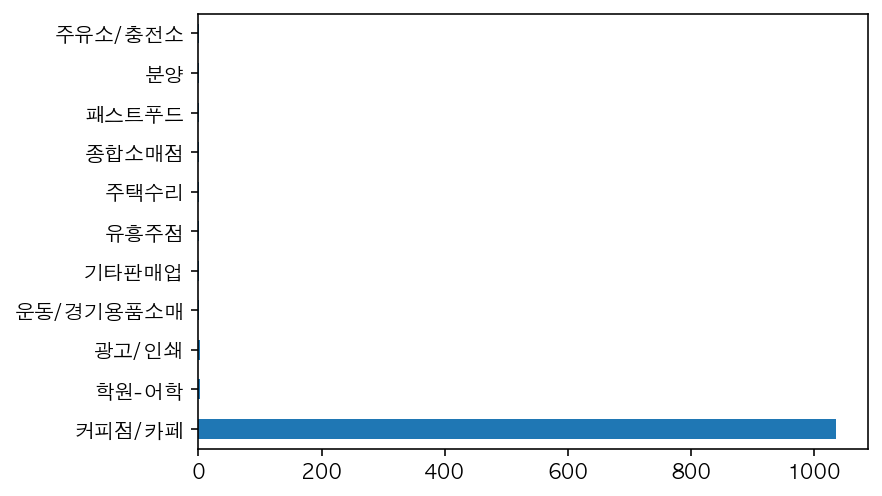

In [231]:
df_cafe['商圏業種中分類名'].value_counts().plot.barh()

In [232]:
print(df_cafe.shape)
df_cafe = df_cafe[df_cafe['商圏業種中分類名'] == '커피점/카페'].copy()
df_cafe.shape

(1049, 13)


(1036, 13)

In [233]:
df_cafe['ブランド名'].value_counts()

Ediya        532
Starbucks    504
Name: ブランド名, dtype: int64

<AxesSubplot:xlabel='ブランド名', ylabel='count'>

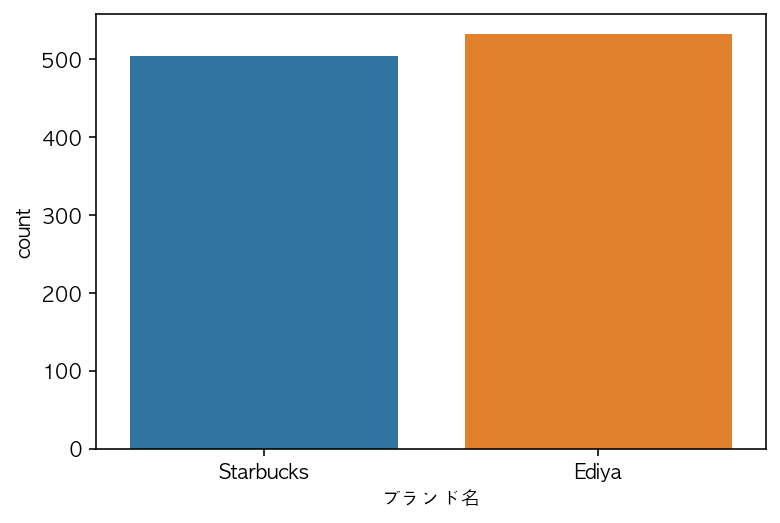

In [234]:
sns.countplot(data = df_cafe, x = 'ブランド名')

<AxesSubplot:xlabel='市区名', ylabel='count'>

/Users/bungkwanji/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/bungkwanji/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21306 missing from current font.
  font.set_text(s, 0, flags=flags)


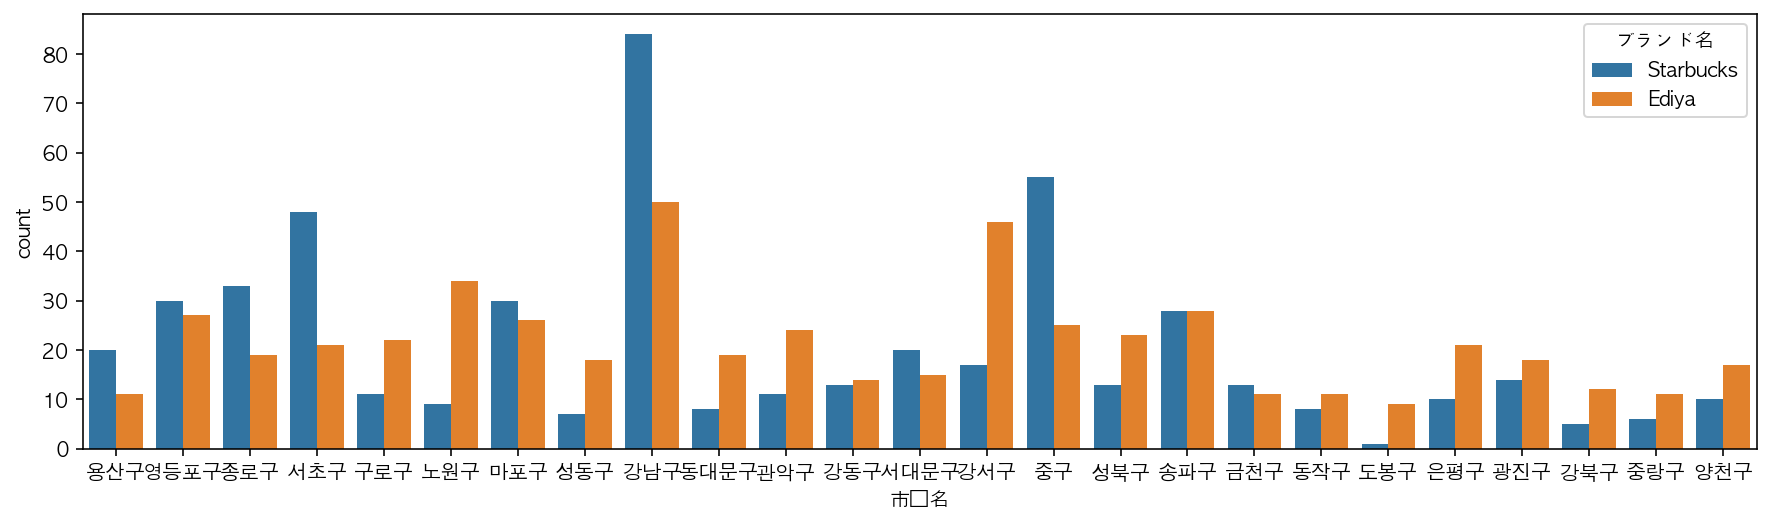

In [235]:
# 市区べつブランド名のcountplot

plt.figure(figsize = (15, 4))
sns.countplot(data = df_cafe, x = '市区名', hue = 'ブランド名')

<AxesSubplot:xlabel='経度', ylabel='緯度'>

/Users/bungkwanji/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 32076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/bungkwanji/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 32076 missing from current font.
  font.set_text(s, 0, flags=flags)


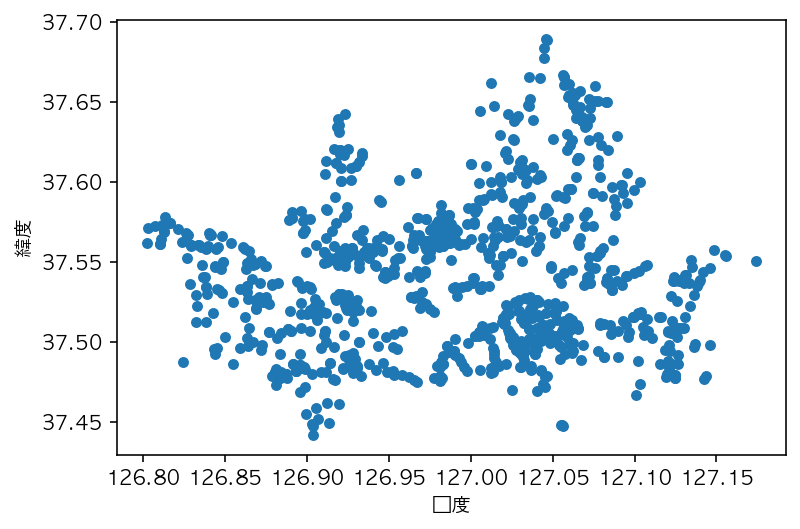

In [236]:
# pandasを利用したscatterplot

df_cafe[['緯度','経度']].plot.scatter(x = '経度', y = '緯度')

<AxesSubplot:xlabel='経度', ylabel='緯度'>

/Users/bungkwanji/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 32076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/bungkwanji/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 32076 missing from current font.
  font.set_text(s, 0, flags=flags)


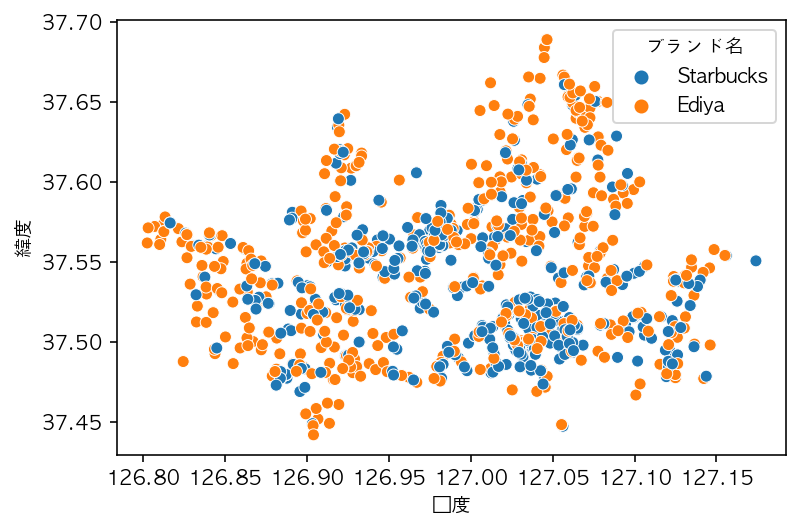

In [237]:
# seabornを利用したscatterplot → （結果）これからソウルの中心部にStarbucksが多く、都外にEdiyaが多いことが確認できる

sns.scatterplot(data = df_cafe, x = '経度', y = '緯度', hue = 'ブランド名')

/Users/bungkwanji/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 32076 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/Users/bungkwanji/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 32076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/bungkwanji/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 32076 missing from current font.
  font.set_text(s, 0, flags=flags)


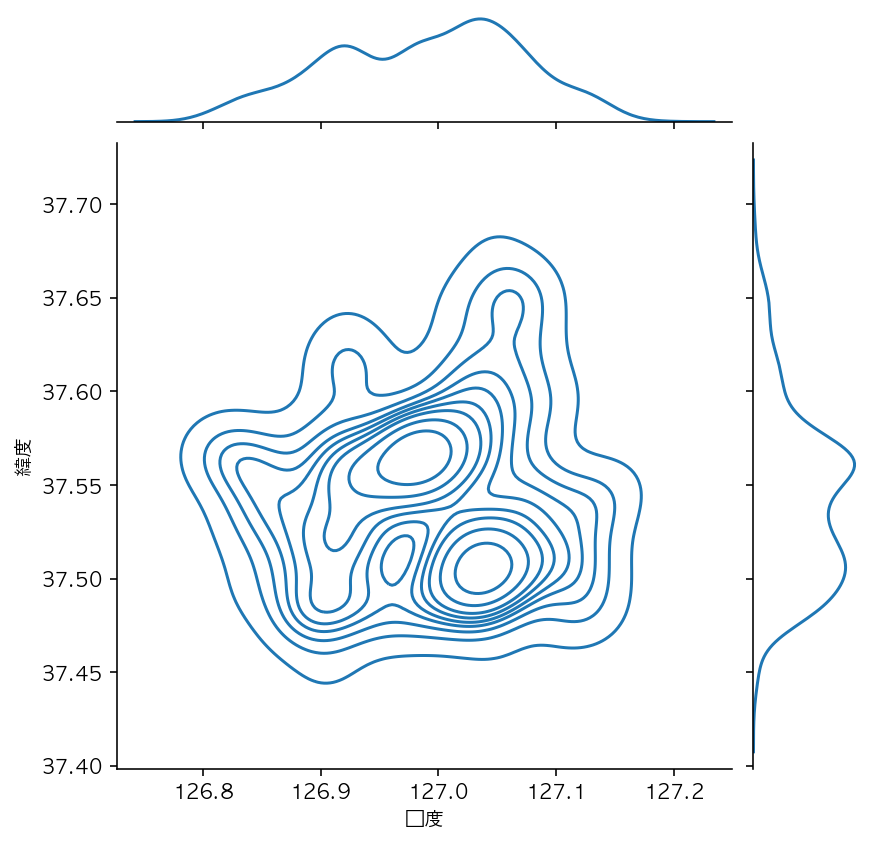

In [238]:
# jointplot　→　（理由）ソウルのどこにカフェが集まっているかを確認するため

sns.jointplot(data = df_cafe, x = '経度', y = '緯度', kind = 'kde')

In [239]:
df_cafe.head()

店名 商圏業種大分類名 商圏業種中分類名     商圏業種小分類名    都市名   市区名         行政洞名  \
1104       스타벅스       음식   커피점/카페  커피전문점/카페/다방  서울특별시   용산구        이태원1동   
1675      이디야커피       음식   커피점/카페  커피전문점/카페/다방  서울특별시  영등포구         신길1동   
2023  스타벅스종로3가점       음식   커피점/카페  커피전문점/카페/다방  서울특별시   종로구  종로1.2.3.4가동   
2770       스타벅스       음식   커피점/카페  커피전문점/카페/다방  서울특별시   서초구          잠원동   
2957      이디야커피       음식   커피점/카페  커피전문점/카페/다방  서울특별시   구로구         구로3동   

      法政洞名                 道路名住所          経度         緯度     店名_小文字      ブランド名  
1104  이태원동    서울특별시 용산구 이태원로 188  126.994781  37.534303       스타벅스  Starbucks  
1675   신길동   서울특별시 영등포구 영등포로 353  126.918062  37.515118      이디야커피      Ediya  
2023  종로3가    서울특별시 종로구 종로 113-1  126.990207  37.570585  스타벅스종로3가점  Starbucks  
2770   잠원동    서울특별시 서초구 강남대로 581  127.019763  37.513663       스타벅스  Starbucks  
2957   구로동  서울특별시 구로구 디지털로32길 43  126.897870  37.484385      이디야커피      Ediya

In [240]:
# 市区名別ブランド名の数確認

df_cafe_vs = df_cafe.groupby(['市区名', 'ブランド名'])['店名'].count()
df_cafe_vs.head()

市区名  ブランド名    
강남구  Ediya        50
     Starbucks    84
강동구  Ediya        14
     Starbucks    13
강북구  Ediya        12
Name: 店名, dtype: int64

In [241]:
# 方法１

df_cafe_vs.to_frame().head()

店名
市区名 ブランド名        
강남구 Ediya      50
    Starbucks  84
강동구 Ediya      14
    Starbucks  13
강북구 Ediya      12

In [242]:
# 方法２　→ 今回はこっちを利用

df_cafe_vs = df_cafe_vs.reset_index()
df_cafe_vs.head()

市区名      ブランド名  店名
0  강남구      Ediya  50
1  강남구  Starbucks  84
2  강동구      Ediya  14
3  강동구  Starbucks  13
4  강북구      Ediya  12

In [243]:
df_cafe_vs.columns = ['区', 'ブランド名', '店数']
df_cafe_vs.head()

区      ブランド名  店数
0  강남구      Ediya  50
1  강남구  Starbucks  84
2  강동구      Ediya  14
3  강동구  Starbucks  13
4  강북구      Ediya  12

In [244]:
# pivot_tableを利用してgroupbyする方法

cafe_pivot = pd.pivot_table(data = df_cafe, index = ['市区名', 'ブランド名'], values = '店名', aggfunc = 'count')

In [245]:
cafe_pivot.reset_index().head()

市区名      ブランド名  店名
0  강남구      Ediya  50
1  강남구  Starbucks  84
2  강동구      Ediya  14
3  강동구  Starbucks  13
4  강북구      Ediya  12

In [246]:
cafe_pivot.loc['강남구']

店名
ブランド名        
Ediya      50
Starbucks  84

<AxesSubplot:xlabel='区', ylabel='店数'>

/Users/bungkwanji/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/bungkwanji/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/bungkwanji/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21306 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/bungkwanji/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)


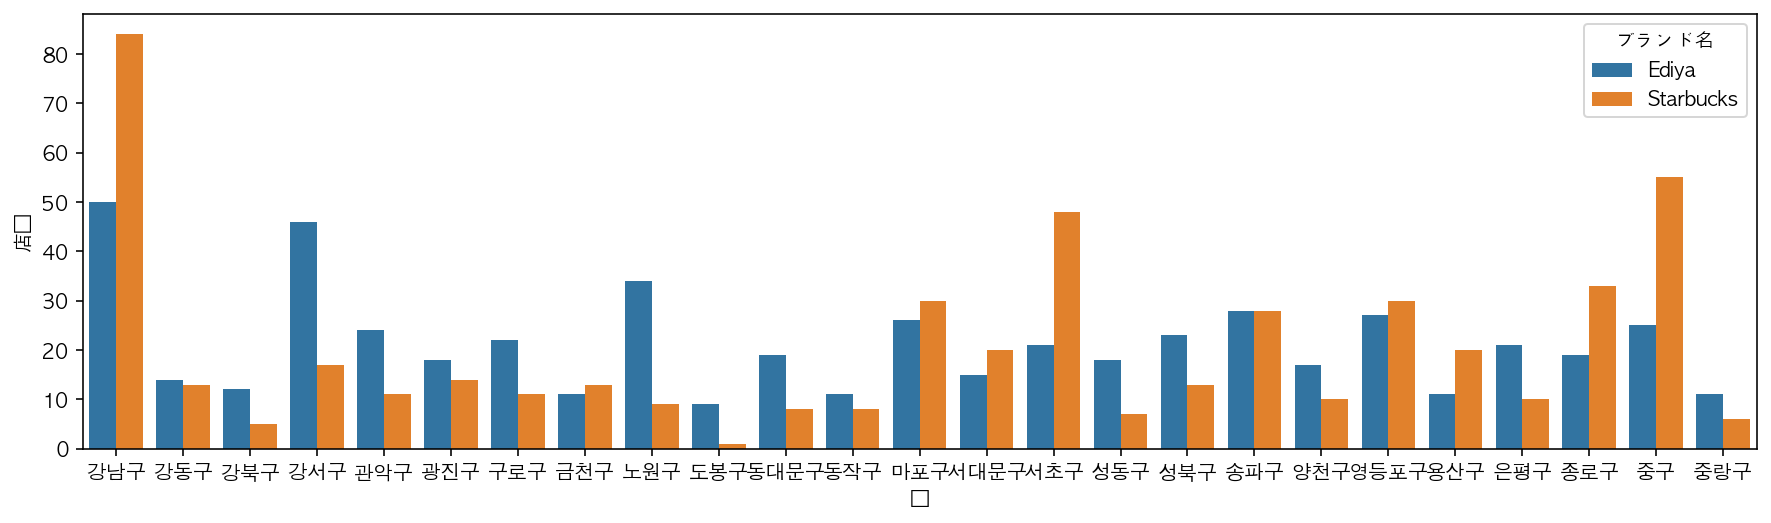

In [247]:
# Seaborn(barplot)を利用し、区別店数を確認

plt.figure(figsize = (15, 4))
sns.barplot(data = df_cafe_vs, x = '区', y = '店数', hue = 'ブランド名')

<AxesSubplot:xlabel='市区名,ブランド名'>

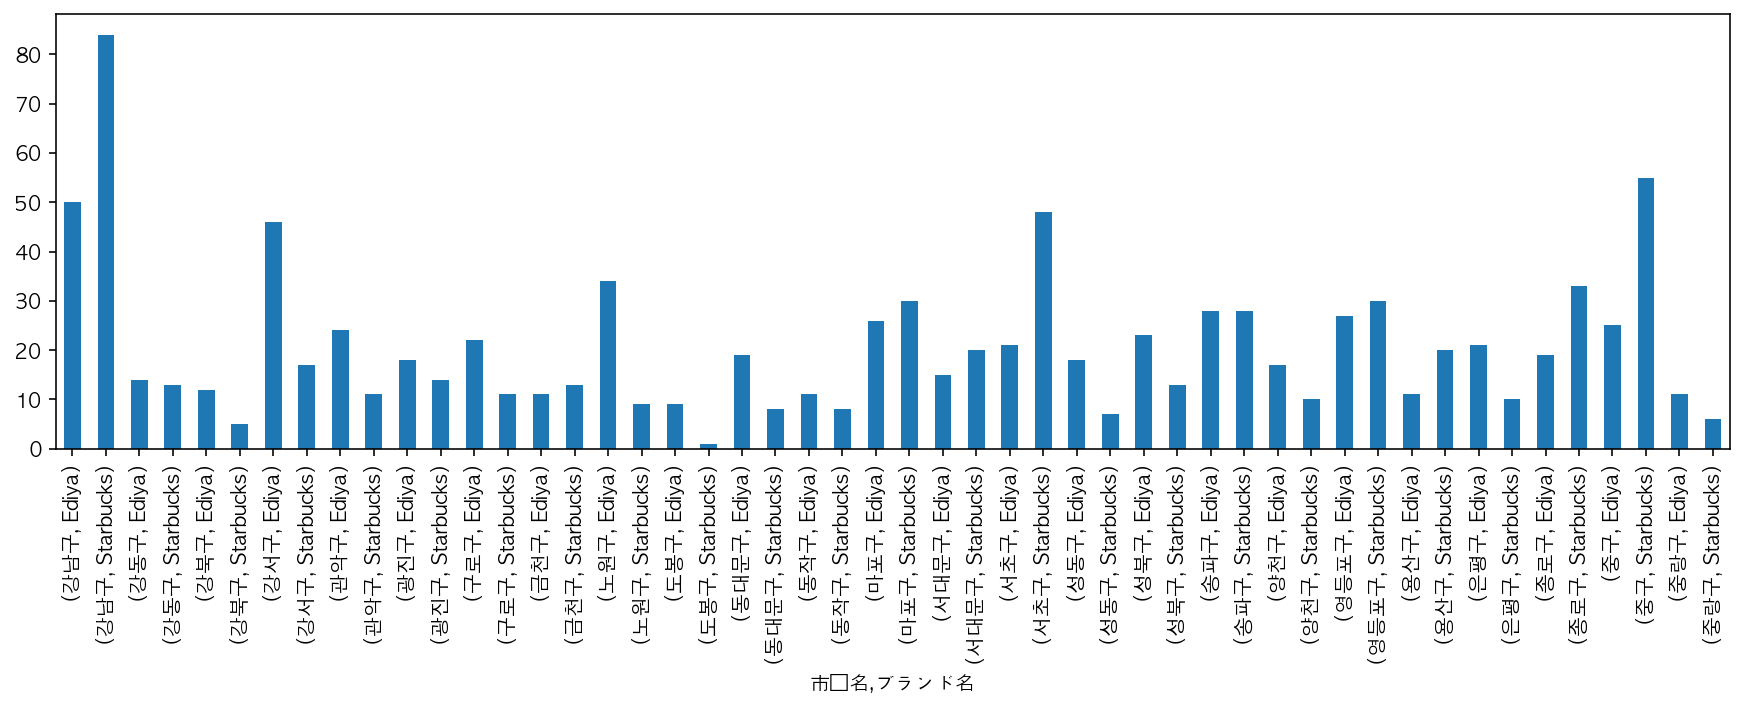

In [248]:
# Groupbyを利用し、区別店数を確認 1

group = df_cafe.groupby(['市区名', 'ブランド名'])['店名'].count()
group.plot.bar(figsize = (15, 4))

<AxesSubplot:xlabel='市区名'>

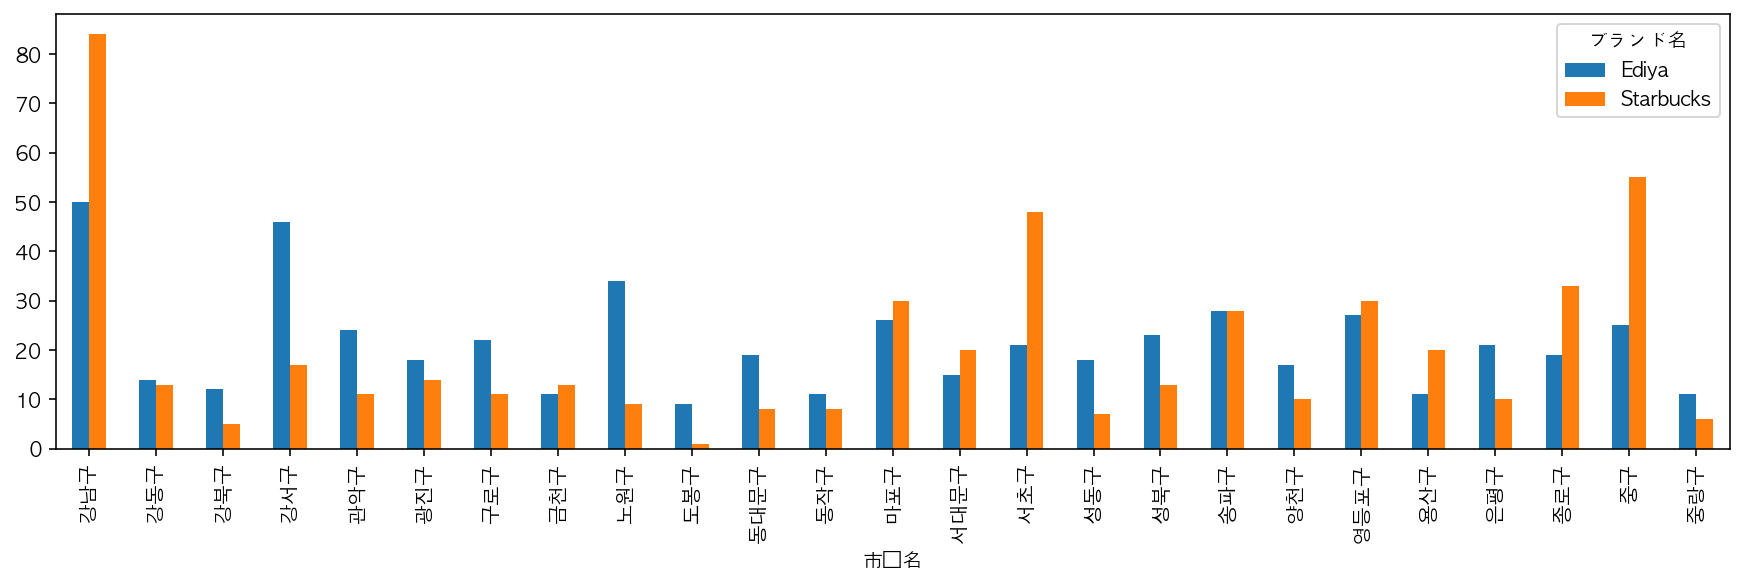

In [249]:
# Groupbyを利用し、区別店数を確認 2

group.unstack().plot.bar(figsize = (15, 4))

<AxesSubplot:xlabel='市区名'>

/Users/bungkwanji/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/bungkwanji/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21306 missing from current font.
  font.set_text(s, 0, flags=flags)


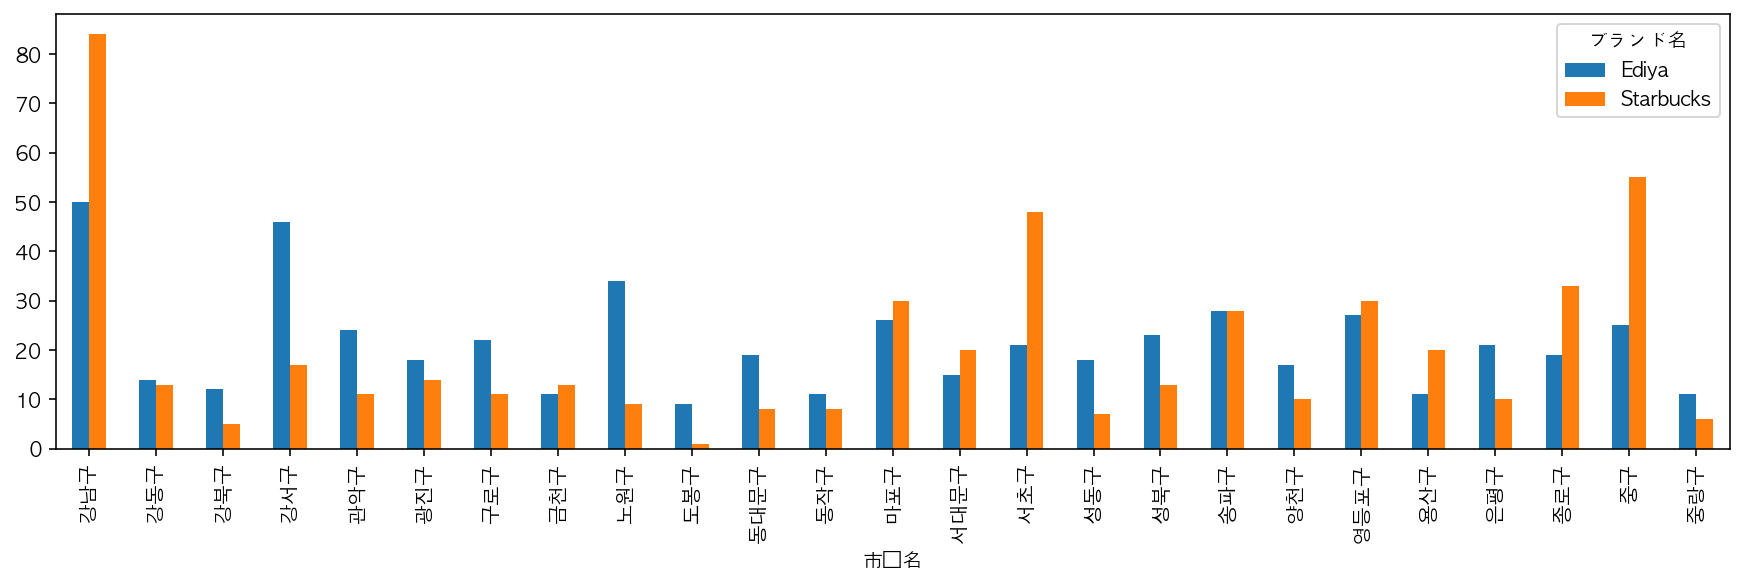

In [250]:
# Pivot_tableを利用し、区別店数を確認 3

pivot = pd.pivot_table(data = df_cafe, index = ['市区名'], columns = 'ブランド名', values = '店名', aggfunc = 'count')
pivot.plot.bar(figsize = (15, 4))

<AxesSubplot:xlabel='市区名', ylabel='count'>

/Users/bungkwanji/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/bungkwanji/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21306 missing from current font.
  font.set_text(s, 0, flags=flags)


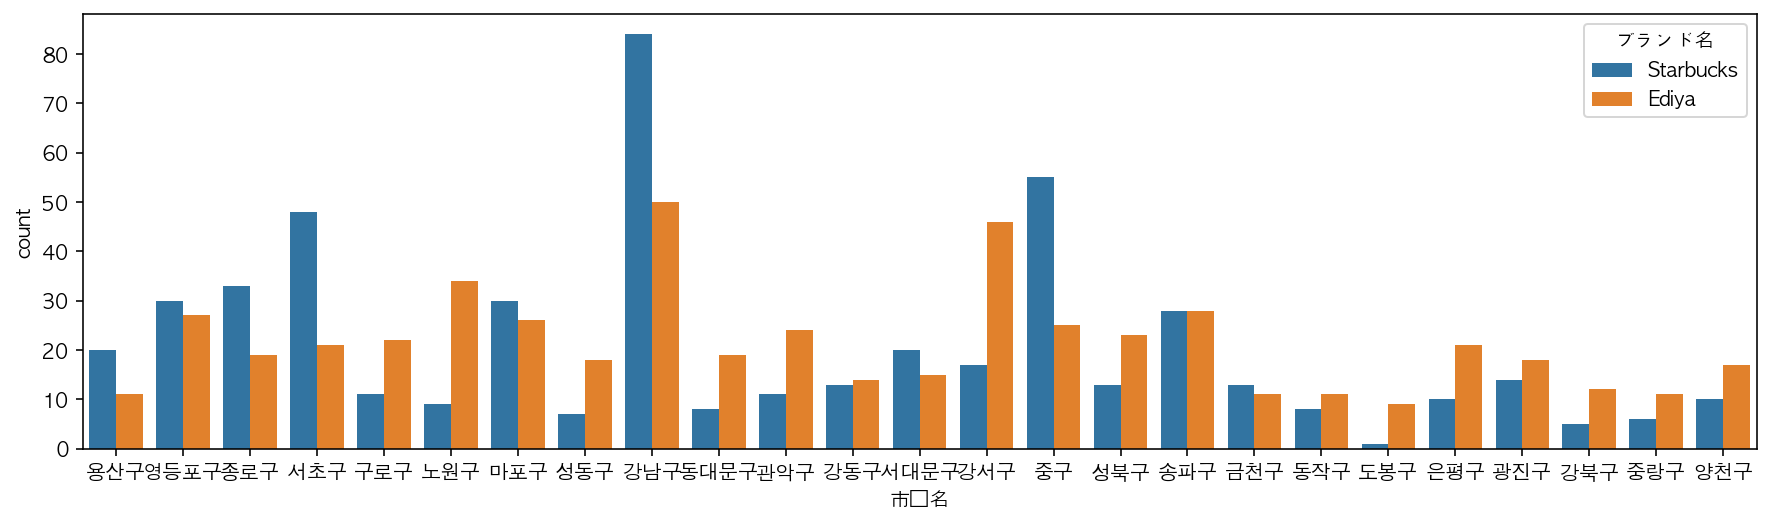

In [251]:
# Seaborn(countplot)を利用し、区別店数を確認

plt.figure(figsize = (15, 4))
sns.countplot(data = df_cafe, x = '市区名', hue = 'ブランド名')

In [252]:
import folium

In [253]:
lat = df_cafe['緯度'].mean()
long = df_cafe['経度'].mean()
lat, long

(37.5429213982126, 126.9887885123524)

In [254]:
m = folium.Map([lat, long], zoom_start = 12, tiles = 'Stamen Toner')

for i in df_cafe.index:
    sub_lat = df_cafe.loc[i, '緯度']
    sub_long = df_cafe.loc[i, '経度']
    
    color = 'green'
    if df_cafe.loc[i, 'ブランド名'] == 'Ediya':
        color = 'blue'
    
    title = df_cafe.loc[i, '店名'] + ' - ' + df_cafe.loc[i, '道路名住所']
    folium.CircleMarker([sub_lat, sub_long], radius = 3, color = color, tooltip=title).add_to(m)
m

In [255]:
geo_path = 'seoul_municipalities_geo_simple.json'

import json
geo_json = json.load(open(geo_path, encoding="utf-8"))

geo_json['features'][0]['properties']['name']

'강동구'

In [256]:
df_star = df_cafe_vs[df_cafe_vs['ブランド名'] == 'Starbucks'].copy()
df_star.head()

区      ブランド名  店数
1  강남구  Starbucks  84
3  강동구  Starbucks  13
5  강북구  Starbucks   5
7  강서구  Starbucks  17
9  관악구  Starbucks  11

In [257]:
geo_json['features'][0]['properties']['name']

'강동구'

In [258]:
# Starbucks - 店舗分布

m = folium.Map([lat, long])

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_star,
    columns=['区', '店数'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.9,
    line_opacity=0.2,
    legend_name='Starbuck数'
).add_to(m)

for i in df_cafe.index:
    sub_lat = df_cafe.loc[i, '緯度']
    sub_long = df_cafe.loc[i, '経度']
    
    color = 'green'
    if df_cafe.loc[i, 'ブランド名'] == 'Ediya':
        color = 'blue'
    
    title = df_cafe.loc[i, '店名'] + ' - ' + df_cafe.loc[i, '道路名住所']
    folium.CircleMarker([sub_lat, sub_long], radius = 3, color = color, tooltip=title).add_to(m)

m

In [259]:
# Ediya - 店舗分布

df_ediya = df_cafe_vs[df_cafe_vs['ブランド名'] == 'Ediya'].copy()
df_ediya.head()

区  ブランド名  店数
0  강남구  Ediya  50
2  강동구  Ediya  14
4  강북구  Ediya  12
6  강서구  Ediya  46
8  관악구  Ediya  24

In [260]:
m = folium.Map([lat, long])

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_ediya,
    columns=['区', '店数'],
    key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.9,
    line_opacity=0.2,
    legend_name='Ediya数'
).add_to(m)

m

In [271]:
df_vs = df_cafe_vs.pivot(index = '区', columns = 'ブランド名', values = '店数')
df_vs['店数比較'] = df_vs['Starbucks'] - df_vs['Ediya'] > 0
df_vs.head()

ブランド名  Ediya  Starbucks   店数比較
区                             
강남구       50         84   True
강동구       14         13  False
강북구       12          5  False
강서구       46         17  False
관악구       24         11  False

In [277]:
df_vs['店数比較'] = df_vs['店数比較'].astype(float)
df_vs.head()

ブランド名  Ediya  Starbucks  店数比較
区                            
강남구       50         84   1.0
강동구       14         13   0.0
강북구       12          5   0.0
강서구       46         17   0.0
관악구       24         11   0.0

In [279]:
df_vs = df_vs.reset_index()
df_vs.head()

ブランド名    区  Ediya  Starbucks  店数比較
0      강남구     50         84   1.0
1      강동구     14         13   0.0
2      강북구     12          5   0.0
3      강서구     46         17   0.0
4      관악구     24         11   0.0

In [286]:
for i in df_vs.index:
    print(df_vs.loc[i, '区'])

강남구
강동구
강북구
강서구
관악구
광진구
구로구
금천구
노원구
도봉구
동대문구
동작구
마포구
서대문구
서초구
성동구
성북구
송파구
양천구
영등포구
용산구
은평구
종로구
중구
중랑구


In [300]:
df_ku_mean = df_cafe.pivot_table(index = '市区名', values = ['経度', '緯度'], aggfunc = 'mean')
df_ku_mean = df_ku_mean.reset_index()
df_ku_mean.head()

市区名          経度         緯度
0  강남구  127.046129  37.505744
1  강동구  127.135417  37.540316
2  강북구  127.022897  37.631146
3  강서구  126.837883  37.555966
4  관악구  126.935210  37.482054

In [303]:
df_vs = df_vs.merge(df_ku_mean, how = 'inner', left_on = '区', right_on = '市区名')

In [334]:
# Starbucks VS Ediya 店数比較

m = folium.Map([lat, long], zoom_start = 11)

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_vs,
    columns=['区', '店数比較'],
    key_on='feature.properties.name',
    fill_color='BuGn',
    fill_opacity=0.6,
    line_opacity=0.2,
    legend_name='店数比較'
).add_to(m)


for i in df_vs.index:
    sub_long = df_vs.loc[i, '経度']
    sub_lat = df_vs.loc[i, '緯度']
    
    cafes = ['Starbucks', 'Ediya']
    for cafe in cafes:
        cafe_count = df_vs.loc[i, cafe]
        radius = np.sqrt(cafe_count) * 3
        ku = df_vs.loc[i, '区']
        tooltip = f'{ku} {cafe} : {cafe_count}'
        
        color = 'green'
        if cafe == 'Ediya':
            color = 'blue'
            sub_long = sub_long + 0.01
        folium.CircleMarker([sub_lat, sub_long], radius = radius, fill = True, color = color, tooltip = tooltip).add_to(m)
    
m

In [320]:
df_vs.loc[i, cafe]

84